## Sentiment Classification: classifying IMDB reviews

In this task, you will learn how to process text data and how to train neural networks with limited input text data using pre-trained embeddings for sentiment classification (classifying a review document as "positive" or "negative" based solely on the text content of the review).

We will use the `Embedding` layer in Keras to represent text input. The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. It takes as input integers, then looks up these integers into an internal dictionary, and finally returns the associated vectors. It's effectively a dictionary lookup.

The `Embedding` layer takes as input a 2D tensor of integers, of shape `(samples, sequence_length)`, where each entry is a sequence of integers. It can embed sequences of variable lengths, so for instance we could feed into our embedding layer above batches that could have  shapes `(32, 10)` (batch of 32 sequences of length 10) or `(64, 15)` (batch of 64 sequences of length 15). All sequences in a batch must have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating point tensor, of shape `(samples, sequence_length, embedding_dimensionality)`. Such a 3D tensor can then be processed by a RNN layer or a 1D convolution layer.

You can instantiate the `Embedding` layer by randomly initialising its weights (its internal dictionary of token vectors). During training, these word vectors will be gradually adjusted via backpropagation, structuring the space into something that the downstream model can exploit. Once fully trained, your embedding space will show a lot of structure -- a kind of structure specialized for the specific problem you were training your model for. You can also instantiate the `Embedding` layer by intialising its weights using the pre-trained word embeddings, such as GloVe word embeddings pretrained from Wikipedia articles.

#### a) Download the IMDB data as raw text

First, create a "data" directory, then head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just Google "IMDB dataset"). Save it into the "data" directory. Uncompress it. Store the individual reviews into a list of strings, one string per review, and also collect the review labels (positive / negative) into a separate `labels` list.

In [18]:
import os
#this code can aviod kernel error during plt
#https://github.com/dmlc/xgboost/issues/1715
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# write your code here
def read_txt(path,txtlength=None):
    files= os.listdir(path) #get all filename in this folder
    txt = []
    labels = []
    for file in files[:txtlength]: #get the first txtlength file
        if not os.path.isdir(file): #if it is folder, we will not open it
            f = open(path+"/"+file); 
            iter_f = iter(f); #create iter
            str = ""
            for line in iter_f: #read txt
              str = str + line
            txt.append(str) #store txt
            label = 1 if path.split('/')[-2] == 'pos' else 0 #generate labels
            labels.append(label)
    return txt,labels 


train_pos_path = "./data/aclImdb/train/pos/" #path for positive train txt and noly read 500 files
train_pos_list,train_pos_label=read_txt(train_pos_path,500)
train_neg_path = "./data/aclImdb/train/neg/" #path for negative train txt and noly read 500 files
train_neg_list,train_neg_label=read_txt(train_neg_path,500)
test_pos_path = "./data/aclImdb/test/pos/" #path for positive test txt 
test_pos_list,test_pos_label=read_txt(test_pos_path)
test_neg_path = "./data/aclImdb/test/neg/" #path for negative test txt 
test_neg_list,test_neg_label=read_txt(test_neg_path)

#combine train and test data
train_data_raw=train_pos_list+train_neg_list
train_label_raw=train_pos_label+train_neg_label
test_data_raw=test_pos_list+test_neg_list
test_label_raw=test_pos_label+test_neg_label
print(type(test_data_raw),len(test_label_raw),train_label_raw)



<class 'list'> 25000 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

output the result to make sure the correctness of operation

#### b) Pre-process the review documents 

Pre-process review documents by tokenisation and split the data into the training and testing sets. You can restrict the training data to the first 1000 reviews and only consider the top 5,000 words in the dataset. You can also cut reviews after 100 words (that is, each review contains a maximum of 100 words).

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# write your code here  
#tokenizing the train data and only get 5000 most common words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data_raw)
train_sequences = tokenizer.texts_to_sequences(train_data_raw)
#get the index of each in train set
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

#set the maxlen is 100 and get sequences
train_data = pad_sequences(train_sequences, maxlen=100)


print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', len(train_label_raw))

# split the data into a training set and a validation set and shuffle the data
index = np.arange(train_data.shape[0])
np.random.shuffle(index)
train_data = train_data[index]
train_label = np.array(train_label_raw)[index]
validation_size = int(0.9 * train_data.shape[0])

x_train = train_data[:validation_size]
y_train = train_label[:validation_size]
x_val = train_data[validation_size:]
y_val = train_label[validation_size:]

print(len(x_train),len(y_val),x_val[0],type(x_train),type(y_train))


Found 19390 unique tokens.
Shape of data tensor: (1000, 100)
Shape of label tensor: 1000
900 100 [   0   27    4    1  252   94  181  113  306  158 1487   19   13 3531
  175   13  467    9  338  212   20   81  538   13    1  185 1104   30
    1  120    6    6   43    4    1  581  134   63  887    9  541    6
    6   43  134   63   32   82   11   13 2367   37  357    1 2324    3
 2492   30    1  120 4275    9  338   68    2 2324  567 2405  919   81
    1   82 1704  199    8    1  171 1166  478    1  487   16   27   55
  112   12  101 1354 1722    3   33   85  207  510  510   68   88 1737
  141   11] <class 'numpy.ndarray'> <class 'numpy.ndarray'>


This result shows that only 1000 reviews has 19390 unique tokens. Some of them may be only appear once, so we only use the most common 500. Set max length 100 is because most reviews is less than 100 tokens. If we set big length like 500, most squences will have lots of 0. There will be a sparse metrix. After this operation,the texts become tensors that can be fed into a neural network.

#### c) Download the GloVe word embeddings and map each word in the dataset into its pre-trained GloVe word embedding.

First go to `https://nlp.stanford.edu/projects/glove/` and download the pre-trained 
embeddings from 2014 English Wikipedia into the "data" directory. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

Parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number vectors).

Build an embedding matrix that will be loaded into an `Embedding` layer later. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [29]:
# write your code here
#glove path
glovepath='./data/glove.6B/glove.6B.100d.txt'
#get glove dict
def get_golve(path):
    glove={}
    with open(path,encoding='UTF-8') as f:
        for line in f:
            words = line.split()
            word = words[0]
            glove[word] = np.array(words[1:],dtype=np.float32)
    return glove
#get glove list
glove_nda=get_golve(glovepath)
print(glove_nda['to'])


#initial embedding_matrix
embedding_matrix = np.zeros((5000+1, 100))
#get embedding_matrix 
for word, i in train_word_index.items():
    if i > 5000:
        continue
    #get the vector
    embedding_vector = glove_nda.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


        


[-1.8970e-01  5.0024e-02  1.9084e-01 -4.9184e-02 -8.9737e-02  2.1006e-01
 -5.4952e-01  9.8377e-02 -2.0135e-01  3.4241e-01 -9.2677e-02  1.6100e-01
 -1.3268e-01 -2.8160e-01  1.8737e-01 -4.2959e-01  9.6039e-01  1.3972e-01
 -1.0781e+00  4.0518e-01  5.0539e-01 -5.5064e-01  4.8440e-01  3.8044e-01
 -2.9055e-03 -3.4942e-01 -9.9696e-02 -7.8368e-01  1.0363e+00 -2.3140e-01
 -4.7121e-01  5.7126e-01 -2.1454e-01  3.5958e-01 -4.8319e-01  1.0875e+00
  2.8524e-01  1.2447e-01 -3.9248e-02 -7.6732e-02 -7.6343e-01 -3.2409e-01
 -5.7490e-01 -1.0893e+00 -4.1811e-01  4.5120e-01  1.2112e-01 -5.1367e-01
 -1.3349e-01 -1.1378e+00 -2.8768e-01  1.6774e-01  5.5804e-01  1.5387e+00
  1.8859e-02 -2.9721e+00 -2.4216e-01 -9.2495e-01  2.1992e+00  2.8234e-01
 -3.4780e-01  5.1621e-01 -4.3387e-01  3.6852e-01  7.4573e-01  7.2102e-02
  2.7931e-01  9.2569e-01 -5.0336e-02 -8.5856e-01 -1.3580e-01 -9.2551e-01
 -3.3991e-01 -1.0394e+00 -6.7203e-02 -2.1379e-01 -4.7690e-01  2.1377e-01
 -8.4008e-01  5.2536e-02  5.9298e-01  2.9604e-01 -6

We map tokens to embeddings by leverageing train_word_index and glove to compute embedding matrix.When get the embedding matrix, we should set the rows as maxlength+1, because the first rows has other function. The output is a simple of 'to' in glove100d.

#### d) Build and train a simple Sequential model

The model contains an Embedding Layer with maximum number of tokens to be 10,000 and embedding dimensionality as 100. Initialise the Embedding Layer with the pre-trained GloVe word vectors. Set the maximum length of each review to 100. Flatten the 3D embedding output to 2D and add a Dense Layer which is the classifier. Train the model with a 'rmsprop' optimiser. You need to freeze the embedding layer by setting its `trainable` attribute to `False` so that its weights will not be updated during training.

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.initializers import Constant
# write your code here
#set embedding layer
embedding_layer = Embedding(5001,
                            100,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=100,
                            trainable=False)
#build model
model= Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#train model
history=model.fit(x_train, y_train,
          batch_size=128,
          epochs=50,
          validation_data=(x_val, y_val))

Train on 900 samples, validate on 100 samples
Epoch 1/50
900/900 [==============================] - 1s 885us/step - loss: 1.3332 - acc: 0.4733 - val_loss: 0.9842 - val_acc: 0.5300
Epoch 2/50
900/900 [==============================] - 0s 35us/step - loss: 0.7507 - acc: 0.5267 - val_loss: 0.8999 - val_acc: 0.5500
Epoch 3/50
900/900 [==============================] - 0s 34us/step - loss: 0.6437 - acc: 0.6189 - val_loss: 0.6749 - val_acc: 0.6500
Epoch 4/50
900/900 [==============================] - 0s 32us/step - loss: 0.5942 - acc: 0.6267 - val_loss: 0.7345 - val_acc: 0.5600
Epoch 5/50
900/900 [==============================] - 0s 35us/step - loss: 0.5197 - acc: 0.7089 - val_loss: 1.2245 - val_acc: 0.4800
Epoch 6/50
900/900 [==============================] - 0s 30us/step - loss: 0.6371 - acc: 0.6044 - val_loss: 0.6620 - val_acc: 0.6700
Epoch 7/50
900/900 [==============================] - 0s 31us/step - loss: 0.4279 - acc: 0.8244 - val_loss: 1.0207 - val_acc: 0.5200
Epoch 8/50
900/900 [==

In this part,we use embedding to train a model. Using flatten to change problem to 2D and use rmsprop to optimize. This model overfited heavily. The loss in train is extremely small while in validation is much higher. The reason is we use to much epochs and this model is a simple model. 

#### e) Plot the training and validation loss and accuracies and evaluate the trained model on the test set.

What do you observe from the results?

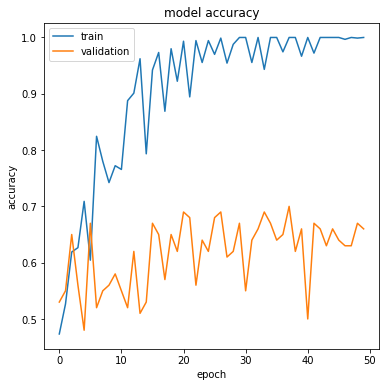

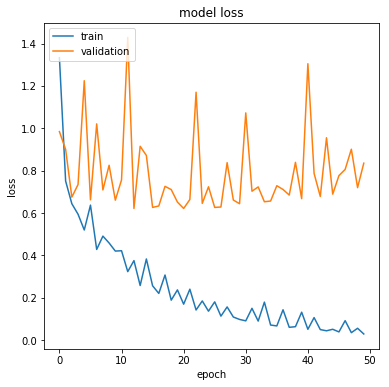

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


This result shows that embedding can help models converge quickly. In this model, the model converges within 10 epochs during training process. However, the accuracy is low.This is becasue our train data is too small, we cannot build a powerful model.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
#generate test data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(test_data_raw)
test_sequences = tokenizer.texts_to_sequences(test_data_raw)

test_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(test_word_index))

test_data = pad_sequences(test_sequences, maxlen=100)

print('Shape of data tensor:', test_data.shape)
print('Shape of label tensor:', len(test_label_raw))

#shuffle data
indextest = np.arange(test_data.shape[0])
np.random.shuffle(indextest)
test_data = test_data[indextest]
test_label = np.array(test_label_raw)[indextest]


x_test = test_data[:]
y_test = test_label[:]

#evaluate model
score, acc = model.evaluate(x_test, y_test)
test_pred = model.predict(x_test)
for i in range(len(test_pred)):
    test_pred[i]=int(1) if test_pred[i] >0.5 else int(0) 
print('acc=%.3f'% acc)
#get report
print(classification_report(y_test, test_pred))
#get matrix
print(confusion_matrix(y_test, test_pred))

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: 25000
25000/25000 [==============================] - 1s 22us/step
acc=0.511
              precision    recall  f1-score   support

           0       0.51      0.76      0.61     12500
           1       0.52      0.26      0.34     12500

   micro avg       0.51      0.51      0.51     25000
   macro avg       0.51      0.51      0.48     25000
weighted avg       0.51      0.51      0.48     25000

[[9561 2939]
 [9287 3213]]


From the result in test set, we can find that the accuracy is low. This is becasue our train data is too small, we cannot build a powerful model.

#### f) Add an LSTM layer into the simple neural network architecture and re-train the model on the training set, plot the training and validation loss/accuracies, also evaluate the trained model on the test set and report the result.

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 0s 425us/step - loss: 9.6672e-04 - acc: 1.0000 - val_loss: 1.2195 - val_acc: 0.6600
Epoch 2/20
900/900 [==============================] - 0s 47us/step - loss: 3.4119e-04 - acc: 1.0000 - val_loss: 1.2286 - val_acc: 0.6300
Epoch 3/20
900/900 [==============================] - 0s 48us/step - loss: 3.1554e-04 - acc: 1.0000 - val_loss: 1.4792 - val_acc: 0.6200
Epoch 4/20
900/900 [==============================] - 0s 47us/step - loss: 7.7816e-04 - acc: 1.0000 - val_loss: 1.2143 - val_acc: 0.6500
Epoch 5/20
900/900 [==============================] - 0s 45us/step - loss: 2.5456e-04 - acc: 1.0000 - val_loss: 1.2164 - val_acc: 0.6300
Epoch 6/20
900/900 [==============================] - 0s 45us/step - loss: 2.4075e-04 - acc: 1.0000 - val_loss: 1.3068 - val_acc: 0.6300
Epoch 7/20
900/900 [==============================] - 0s 46us/step - loss: 5.0412e-04 - acc: 1.0000 - val_loss: 1.2237 - val_acc: 0

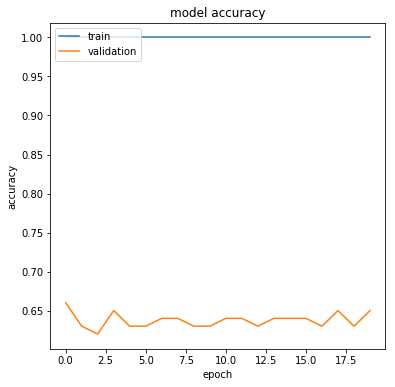

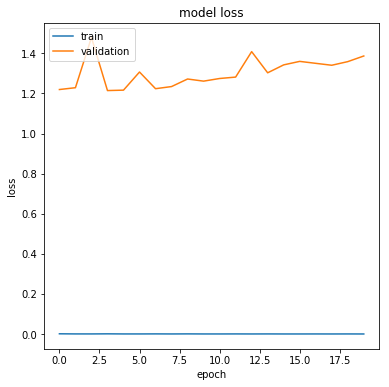

25000/25000 [==============================] - 37s 1ms/step
acc=0.499
              precision    recall  f1-score   support

           0       0.50      0.20      0.29     12500
           1       0.50      0.79      0.61     12500

   micro avg       0.50      0.50      0.50     25000
   macro avg       0.50      0.50      0.45     25000
weighted avg       0.50      0.50      0.45     25000

[[2536 9964]
 [2571 9929]]


In [28]:
from keras.layers import LSTM

# write your code here
#build new model
model_1= Sequential()
model_1.add(embedding_layer)
model_1.add(LSTM(64,dropout=0.6))
model_1.add(Dense(1,activation='sigmoid'))
model_1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#get intermediate data 
history_1=model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          validation_data=(x_val, y_val))
#plot acc
plt.figure(figsize=(6, 6))
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#plot loss
plt.figure(figsize=(6, 6))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score_1, acc_1 = model_1.evaluate(x_test, y_test)
test_pred_1 = model_1.predict(x_test)
for i in range(len(test_pred_1)):
    test_pred_1[i]=int(1) if test_pred_1[i] >0.5 else int(0) 
print('acc=%.3f'% acc_1)
#get reprot
print(classification_report(y_test, test_pred_1))
#get matrix 
print(confusion_matrix(y_test, test_pred_1))

In this part, i build a lstm model to train data. Although i only use one layer, but this model converge rather quickly. This is becasue Lstm model is better than ordinary fully connected layers. But the accuracy in test set is also bad, it is because the train data too small.